In [7]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [10]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install folium

  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/18/09/8569904c8ce5679cc02826d98de633c07abcd2443a23181e5f71ff9dacbc/folium-0.15.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/17/ce/14166d0e273d12065516625fb02426350298e7b4ba59198b5fe454b46202/branca-0.7.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/97.0 kB ? eta -:--:--
   ---------------------------------------- 97.0/97.0 kB 5.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [27]:
zipcodes = gpd.read_file('./data/COH_ZIPCODE.geojson')
print(zipcodes.crs)
zipcodes.head( )

EPSG:4326


,OBJECTID,Zip_Code,ShapeSTArea,ShapeSTLength,geometry
0,1,77578,1.040961e+09,207894.485496,"POLYGON ((-95.38367 29.53352, -95.38367 29.533..."
1,2,77430,3.342530e+09,401961.077355,"POLYGON ((-95.59310 29.37761, -95.59343 29.377..."
2,3,77665,3.784108e+09,443732.282551,"POLYGON ((-94.47512 29.76213, -94.47503 29.762..."
3,4,77575,6.860986e+09,699223.670411,"POLYGON ((-94.72899 29.88731, -94.72829 29.887..."
4,5,77475,6.753195e+08,215505.452955,"MULTIPOLYGON (((-96.62689 29.52229, -96.62689 ..."


In [22]:
print(zipcodes.loc[0, 'geometry'])

MULTIPOLYGON (((3670527.8721688986 13969264.569942772, 3670718.651062548 13965782.069801733, 3665343.0222683996 13963380.81546779, 3669997.8634746224 13952804.303496197, 3664282.858243659 13946746.174612582, 3663820.7630633265 13936195.081167057, 3700407.305584848 13938695.873508543, 3701588.728033796 13907661.523989126, 3733282.572201714 13908523.124444112, 3753788.6249363124 13912404.324354708, 3762695.633882135 13920653.155495748, 3762113.564411372 13916117.292650282, 3761584.9073038995 13915537.567616567, 3761085.259194568 13911966.88967061, 3761593.3810125142 13896387.712562054, 3763437.823446721 13898417.197166398, 3769863.821391642 13896443.577829212, 3784276.994402319 13895841.139741391, 3794820.7114155293 13905816.757289857, 3793392.8845718205 13910904.033362031, 3795347.866059527 13917395.736212015, 3791966.060221374 13923928.98977144, 3792690.115372613 13928576.29751192, 3783515.783384472 13942552.349611446, 3797508.426837191 13943242.72826399, 3798187.0322960764 13940650.37

In [21]:
zipcodes.loc(-95.8304,29.7404)

TypeError: _LocationIndexer.__call__() takes from 1 to 2 positional arguments but 3 were given

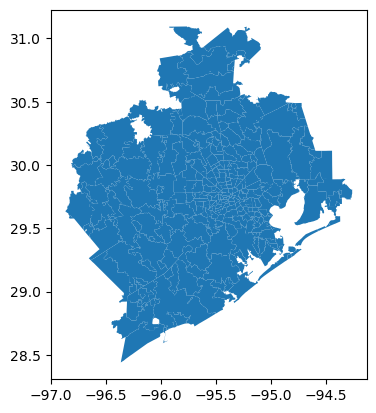

In [28]:
zipcodes.plot();

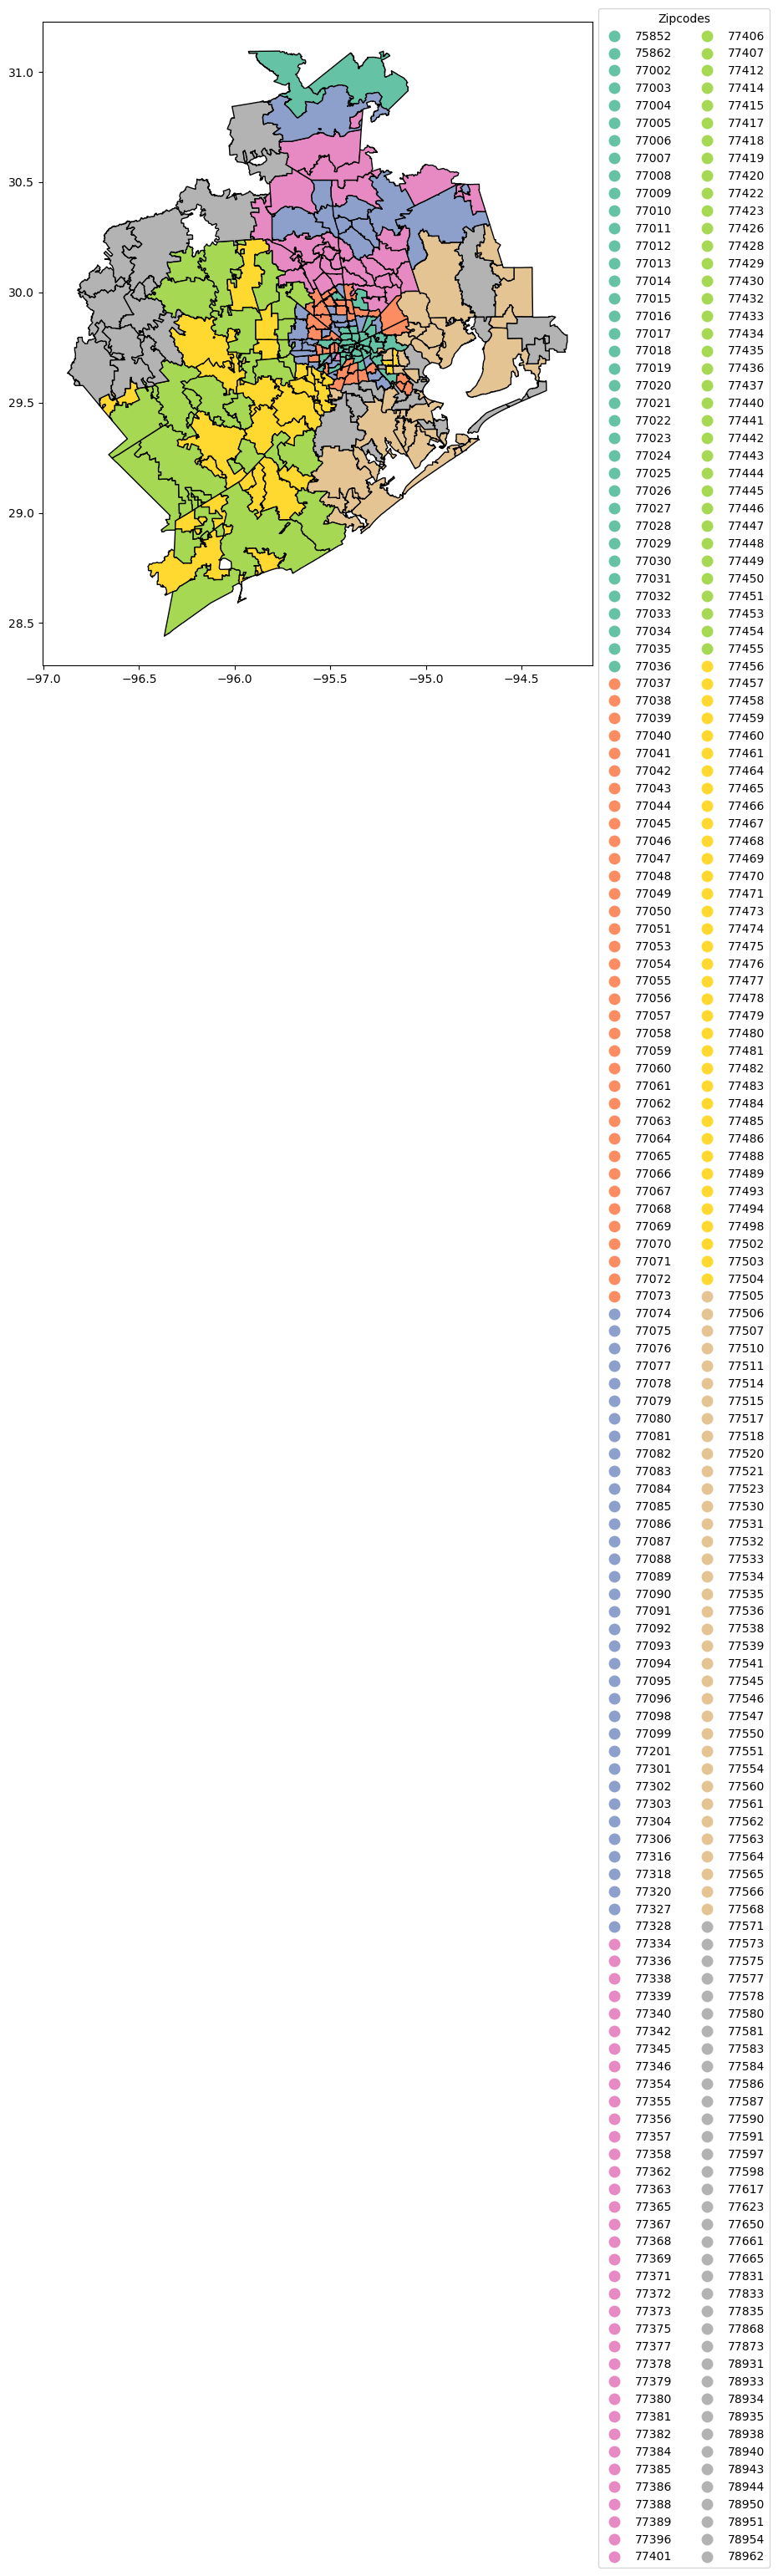

In [30]:
leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcodes.plot(column = 'Zip_Code', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [35]:
spots = pd.read_csv('./data/extra-activities.csv')
print(spots.shape)
spots.head(3)

(61, 6)


,name,type,address,Zip_Code,lat,lon
0,Math Logic Tutoring,math,"5323 Castle Discordia St, Katy, TX",77493,29.85059,-95.81509
1,Mathnasium of Morton Ranch,math,"22720 Morton Ranch Rd #140, Katy, TX",77449,29.81808,-95.76568
2,"The Tutoring Center, Katy TX",elar/math,"2001 Katy Mills Blvd # F, Katy, TX",77494,29.78339,-95.80607


In [32]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [36]:
spots_geo = gpd.GeoDataFrame(spots, 
                           crs = zipcodes.crs, 
                           geometry = gpd.points_from_xy(spots.lon, spots.lat))